# Random Forest Regression

The random forest is a non-linear regression method of *ensemble* learning, which a learning paradigm where we consider multiple different learning algorithms, or mulitples of the same algorithm, and use them together. The idea here is that the whole is much greater than the parts: the algorithms will be more powerful as an ensemble. The basic steps are:

1) We will pick *k* number of random points from the training data set

2) Build a decision tree associated with the *k* data points

3) Choose the number, *N*, of trees that you would like to build

4) Run the *N* decision tree algorithms, each with *k* data points from the training set

5) For a new observation, have each of your tress make a prediction for *y*, and the average of their predicted *y* values is your predicted *y* value

Not too shabby, right? Let's put this into action.

## The Data and The Understanding

We will again use the salary data to see if that potential new hire was telling the truth about making \$160k at their last job.

In [1]:
# bring them in
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# bring in the data
df = pd.read_csv('data/Position_Salaries.csv')

# split the data into features and response
X = df.iloc[:,1:2].values
y = df.iloc[:,-1].values

In [3]:
# fit the random forest regression
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=10, random_state=0)
reg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

With the forest fit we can get to business. Let's take a look at what we got. We expect, being that this is not a continuous model, to see a similar step patter in the visualization.

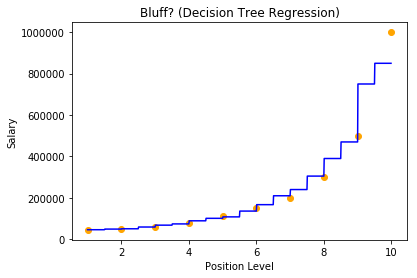

In [4]:
# plot the random forest regression model
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
_ = plt.scatter(X, y, color='orange')
_ = plt.plot(X_grid, reg.predict(X_grid), color='blue')
_ = plt.title('Bluff? (Decision Tree Regression)')
_ = plt.xlabel('Position Level')
_ = plt.ylabel('Salary')

Not only do we see the steps, we see that there are more steps than with the decision tree. This is because the range of levels is now being split into more intervals due to the random forest calculating multiple averages from its decision trees' predictions within each interval. We will note here that if we decide to do this with more decision trees in the random forest this does not imply that we would see more steps. Increasing the number of trees, rather, means we will pbtain more averages for the predictions and the averages will converge to the same average value, as we would expect from entropy.

Now let's see about our prediction. Since we have more steps, we might see a more accurate prediction.

In [5]:
# predit the new result for the 6.5 salary level at the old company
y_pred = reg.predict(6.5)

# what's it say?
print('The Random Forest, with 10 trees, predicts the old salary was $', np.round(float(y_pred)))

The Random Forest, with 10 trees, predicts the old salary was $ 167000.0


Well, we did better than with one tree, but keep in mind that we're the hippies here: we get to plant as many trees as we want! This was with 10. Maybe this forest goes to 11...

Maybe we could tree- I mean, try more trees than that!

In [6]:
# fit the random forest regression with 100 trees
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, random_state=0)
reg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [7]:
# predit the new result for the 6.5 salary level at the old company
y_pred = reg.predict(6.5)

# what's it say?
print('The Random Forest, with 100 trees, predicts the old salary was $', np.round(float(y_pred)))

The Random Forest, with 100 trees, predicts the old salary was $ 158300.0


Even better. Let's kick it up a bit more. Just for giggles.

In [8]:
# fit the random forest regression with 350 trees
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=350, random_state=0)
reg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
# predit the new result for the 6.5 salary level at the old company
y_pred = reg.predict(6.5)

# what's it say?
print('The Random Forest, with 350 trees, predicts the old salary was $', np.round(float(y_pred)))

The Random Forest, with 350 trees, predicts the old salary was $ 160114.0


Okay, so it still looks like the candidate was telling the truth. interesting.